In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
resources = ['punkt', 'wordnet','stopwords','averaged_perceptron_tagger']
nltk.download(resources)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Twitter_Data.csv')
df = df[0:2000]
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.shape

(2000, 2)

In [6]:
df.isnull().sum()

clean_text    1
category      0
dtype: int64

In [7]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,clean_text,category
148,NaN,0.0


In [8]:
df = df.dropna()
df.shape


(1999, 2)

In [9]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

<Axes: xlabel='category', ylabel='Count'>

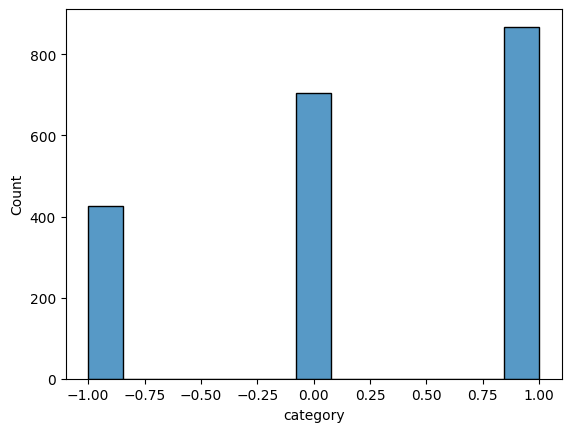

In [10]:
X = df.clean_text
y = df.category

sns.histplot(y)

In [11]:
# To clean the text of non alphabets

X = X.str.replace(r'[^a-zA-Z\s]', '', regex=True)
X

0       when modi promised minimum government maximum ...
1       talk all the nonsense and continue all the dra...
2       what did just say vote for modi  welcome bjp t...
3       asking his supporters prefix chowkidar their n...
4       answer who among these the most powerful world...
                              ...                        
1995    eam have decided not criticise bullshits befor...
1996    modi meetings andhra pradesh march april modi ...
1997    one vote can make all the difference anil kapo...
1998         yes want see this movie great narendra modi 
1999    documents reveal modi and javadekars war india...
Name: clean_text, Length: 1999, dtype: object

In [13]:
# removing numbers and special characters
df['cleaned_text'] = df['clean_text'].str.replace('[^a-zA-Z\s]','',regex=True)

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    fil_words = [word for word in words if word not in stop_words]
    new_sentence = ' '.join(fil_words)
    return new_sentence

df['c2'] = df['cleaned_text'].apply(remove_stopwords)
df.head()

,clean_text,category,cleaned_text,c2
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer among powerful world leader today trump...


In [14]:
# tokenization of words

from nltk.tokenize import word_tokenize
df['c2'] = df['c2'].apply(word_tokenize)
df.head()

,clean_text,category,cleaned_text,c2
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today..."


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('punkt')  # Download the NLTK data for tokenization
nltk.download('averaged_perceptron_tagger')  # Download the NLTK data for POS tagging
nltk.download('wordnet')  # Download the NLTK data for WordNet lemmatizer

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN  # Default to noun if the tag is not recognized

def lemmatize_with_pos(text):
    # Tokenize the input text
    tokens = word_tokenize(text)

    # Perform POS tagging on the tokens
    tagged_tokens = pos_tag(tokens)

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each token using the mapped POS tag
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged_tokens]

    return lemmatized_tokens

input_text = "The quick brown foxes are jumping over the lazy dogs"
lemmatized_tokens = lemmatize_with_pos(input_text)
print(lemmatized_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['The', 'quick', 'brown', 'fox', 'be', 'jump', 'over', 'the', 'lazy', 'dog']
